<a href="https://colab.research.google.com/github/DhrubaAdhikary/EIP-4-training/blob/master/nasnet_with_CLR_reset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# mount gdrive and unzip data
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)
!unzip -q "/content/gdrive/My Drive/hvc_data.zip"
# look for `hvc_annotations.csv` file and `resized` dir
%ls 

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive
gdrive/  hvc_annotations.csv  resized/  sample_data/


In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from keras.applications.inception_v3 import InceptionV3, preprocess_input
from keras.preprocessing import image
from keras.models import Model
from keras.layers import Dense, GlobalAveragePooling2D
from keras import backend as K
from keras.layers import Input
from keras import models
from keras import layers
from keras import optimizers
import random 
from keras.preprocessing.image import ImageDataGenerator
from random import randrange
import cv2
from keras import backend as K
from keras.callbacks import ModelCheckpoint, LearningRateScheduler
from keras.applications.nasnet import *
from keras.applications.vgg19 import VGG19
from keras.preprocessing import image
from keras.applications.vgg19 import preprocess_input
from keras.layers import Activation, Flatten, Dropout, BatchNormalization

Using TensorFlow backend.


In [3]:
# load annotations
df = pd.read_csv("hvc_annotations.csv")
del df["filename"] # remove unwanted column
df.head()

,gender,imagequality,age,weight,carryingbag,footwear,emotion,bodypose,image_path
0,male,Average,35-45,normal-healthy,Grocery/Home/Plastic Bag,Normal,Neutral,Front-Frontish,resized/1.jpg
1,female,Average,35-45,over-weight,None,Normal,Angry/Serious,Front-Frontish,resized/2.jpg
2,male,Good,45-55,normal-healthy,Grocery/Home/Plastic Bag,CantSee,Neutral,Front-Frontish,resized/3.jpg
3,male,Good,45-55,normal-healthy,Daily/Office/Work Bag,Normal,Neutral,Front-Frontish,resized/4.jpg
4,female,Good,35-45,slightly-overweight,None,CantSee,Neutral,Front-Frontish,resized/5.jpg


In [4]:
df.columns

Index(['gender', 'imagequality', 'age', 'weight', 'carryingbag', 'footwear',
       'emotion', 'bodypose', 'image_path'],
      dtype='object')

In [5]:
one_hot_df = pd.concat([
    df[["image_path"]],
    pd.get_dummies(df.gender, prefix="gender"),
    pd.get_dummies(df.imagequality, prefix="imagequality"),
    pd.get_dummies(df.age, prefix="age"),
    pd.get_dummies(df.weight, prefix="weight"),
    pd.get_dummies(df.carryingbag, prefix="carryingbag"),
    pd.get_dummies(df.footwear, prefix="footwear"),
    pd.get_dummies(df.emotion, prefix="emotion"),
    pd.get_dummies(df.bodypose, prefix="bodypose"),
], axis = 1)

one_hot_df.head()

,image_path,gender_female,gender_male,imagequality_Average,imagequality_Bad,imagequality_Good,age_15-25,age_25-35,age_35-45,age_45-55,age_55+,weight_normal-healthy,weight_over-weight,weight_slightly-overweight,weight_underweight,carryingbag_Daily/Office/Work Bag,carryingbag_Grocery/Home/Plastic Bag,carryingbag_None,footwear_CantSee,footwear_Fancy,footwear_Normal,emotion_Angry/Serious,emotion_Happy,emotion_Neutral,emotion_Sad,bodypose_Back,bodypose_Front-Frontish,bodypose_Side
0,resized/1.jpg,0,1,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0
1,resized/2.jpg,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,1,0,0,0,0,1,0
2,resized/3.jpg,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0
3,resized/4.jpg,0,1,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0
4,resized/5.jpg,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,1,0,0,0,0,1,0,0,1,0


In [6]:
one_hot_df.columns

Index(['image_path', 'gender_female', 'gender_male', 'imagequality_Average',
       'imagequality_Bad', 'imagequality_Good', 'age_15-25', 'age_25-35',
       'age_35-45', 'age_45-55', 'age_55+', 'weight_normal-healthy',
       'weight_over-weight', 'weight_slightly-overweight',
       'weight_underweight', 'carryingbag_Daily/Office/Work Bag',
       'carryingbag_Grocery/Home/Plastic Bag', 'carryingbag_None',
       'footwear_CantSee', 'footwear_Fancy', 'footwear_Normal',
       'emotion_Angry/Serious', 'emotion_Happy', 'emotion_Neutral',
       'emotion_Sad', 'bodypose_Back', 'bodypose_Front-Frontish',
       'bodypose_Side'],
      dtype='object')

In [0]:
X=one_hot_df['image_path']
y=one_hot_df[['gender_female', 'gender_male', 'imagequality_Average',
       'imagequality_Bad', 'imagequality_Good', 'age_15-25', 'age_25-35',
       'age_35-45', 'age_45-55', 'age_55+', 'weight_normal-healthy',
       'weight_over-weight', 'weight_slightly-overweight',
       'weight_underweight', 'carryingbag_Daily/Office/Work Bag',
       'carryingbag_Grocery/Home/Plastic Bag', 'carryingbag_None',
       'footwear_CantSee', 'footwear_Fancy', 'footwear_Normal',
       'emotion_Angry/Serious', 'emotion_Happy', 'emotion_Neutral',
       'emotion_Sad', 'bodypose_Back', 'bodypose_Front-Frontish',
       'bodypose_Side']]

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

In [0]:
Train,test=train_test_split(one_hot_df, test_size=0.15, random_state=42)

In [0]:
# X_train = X_train.values.tolist()
# X_test = X_test.values.tolist()

In [0]:
# #train



gender = ['gender_female',
      'gender_male']
gender_train = y_train[gender]
gender_nodes = gender_train.shape[1]
gender_train = gender_train.values.tolist()

imagequality=['imagequality_Average',
      'imagequality_Bad', 'imagequality_Good']

imagequality_train = y_train[imagequality]
imagequality_nodes = imagequality_train.shape[1]
imagequality_train = imagequality_train.values.tolist()      



age=['age_15-25', 'age_25-35',
      'age_35-45', 'age_45-55', 'age_55+']

age_train = y_train[age]
age_nodes = age_train.shape[1]
age_train = age_train.values.tolist()  

weight=['weight_normal-healthy',
      'weight_over-weight', 'weight_slightly-overweight',
      'weight_underweight']

weight_train = y_train[weight]
weight_nodes = weight_train.shape[1]
weight_train = weight_train.values.tolist()  

carryingbag=['carryingbag_Daily/Office/Work Bag',
      'carryingbag_Grocery/Home/Plastic Bag', 'carryingbag_None']

carryingbag_train = y_train[carryingbag]
carryingbag_nodes = carryingbag_train.shape[1]
carryingbag_train = carryingbag_train.values.tolist()  

footwear=['footwear_CantSee', 'footwear_Fancy', 'footwear_Normal']

footwear_train = y_train[footwear]
footwear_nodes = footwear_train.shape[1]
footwear_train = footwear_train.values.tolist()  

emotion=['emotion_Angry/Serious', 'emotion_Happy', 'emotion_Neutral',
      'emotion_Sad']

emotion_train = y_train[emotion]
emotion_nodes = emotion_train.shape[1]
emotion_train = emotion_train.values.tolist()  

bodypose=['bodypose_Back', 'bodypose_Front-Frontish',
      'bodypose_Side']

bodypose_train = y_train[bodypose]
bodypose_nodes = bodypose_train.shape[1]
bodypose_train = bodypose_train.values.tolist()  



In [0]:
# # #test
# gender = ['gender_female',
#        'gender_male']
# gender_test = y_test[gender]
# gender_nodes = gender_test.shape[1]
# gender_test = gender_test.values.tolist()

# imagequality=['imagequality_Average',
#        'imagequality_Bad', 'imagequality_Good']

# imagequality_test = y_test[imagequality]
# imagequality_nodes = imagequality_test.shape[1]
# imagequality_test = imagequality_test.values.tolist()      



# age=['age_15-25', 'age_25-35',
#        'age_35-45', 'age_45-55', 'age_55+']

# age_test = y_test[age]
# age_nodes = age_test.shape[1]
# age_test = age_test.values.tolist()  

# weight=['weight_normal-healthy',
#        'weight_over-weight', 'weight_slightly-overweight',
#        'weight_underweight']

# weight_test = y_test[weight]
# weight_nodes = weight_test.shape[1]
# weight_test = weight_test.values.tolist()  

# carryingbag=['carryingbag_Daily/Office/Work Bag',
#        'carryingbag_Grocery/Home/Plastic Bag', 'carryingbag_None']

# carryingbag_test = y_test[carryingbag]
# carryingbag_nodes = carryingbag_test.shape[1]
# carryingbag_test = carryingbag_test.values.tolist()  

# footwear=['footwear_CantSee', 'footwear_Fancy', 'footwear_Normal']

# footwear_test = y_test[footwear]
# footwear_nodes = footwear_test.shape[1]
# footwear_test = footwear_test.values.tolist()  

# emotion=['emotion_Angry/Serious', 'emotion_Happy', 'emotion_Neutral',
#        'emotion_Sad']

# emotion_test = y_test[emotion]
# emotion_nodes = emotion_test.shape[1]
# emotion_test = emotion_test.values.tolist()  

# bodypose=['bodypose_Back', 'bodypose_Front-Frontish',
#        'bodypose_Side']

# bodypose_test = y_test[bodypose]
# bodypose_nodes = bodypose_test.shape[1]
# bodypose_test = bodypose_test.values.tolist()  

In [0]:
def get_random_eraser(p=0.5, s_l=0.02, s_h=0.4, r_1=0.3, r_2=1/0.3, v_l=0, v_h=255, pixel_level=False):

  """
  p : the probability that random erasing is performed
  s_l, s_h : minimum / maximum proportion of erased area against input image
  r_1, r_2 : minimum / maximum aspect ratio of erased area
  v_l, v_h : minimum / maximum value for erased area
  pixel_level : pixel-level randomization for erased area
  """

  def eraser(input_img):
    img_h, img_w, img_c = input_img.shape
    p_1 = np.random.rand()

    if p_1 > p:
        return input_img

    while True:
        s = np.random.uniform(s_l, s_h) * img_h * img_w
        r = np.random.uniform(r_1, r_2)
        w = int(np.sqrt(s / r))
        h = int(np.sqrt(s * r))
        left = np.random.randint(0, img_w)
        top = np.random.randint(0, img_h)

        if left + w <= img_w and top + h <= img_h:
            break

    if pixel_level:
        c = np.random.uniform(v_l, v_h, (h, w, img_c))
    else:
        c = np.random.uniform(v_l, v_h)

    input_img[top:top + h, left:left + w, :] = c

    return input_img

  return eraser

In [0]:
import keras
import numpy as np


class PersonDataGenerator(keras.utils.Sequence):
    """Ground truth data generator"""

    def __init__(self, df, batch_size=32,shuffle=True ,augmentation=None,type='train'):
        self.df = df
        self.shuffle = shuffle
        self.batch_size=batch_size
        self.on_epoch_end()
        self.augmentation = augmentation
        self.type=type

    def on_epoch_end(self):
      if (self.shuffle == True):
        self.df = self.df.sample(frac=1).reset_index(drop=True)

    def __len__(self):
        return int(np.floor(self.df.shape[0] / self.batch_size))

    def __getitem__(self, index):
        """fetch batched images and targets"""
        images = []

        
        gender_out = []
        imagequality_out = []
        age_out = []
        weight_out = []
        carryingbag_out = []
        footwear_out=[]
        emotion_out=[]
        bodypose_out=[]
        image_path_out=[]

        X=self.df['image_path']
        y=self.df[['gender_female', 'gender_male', 'imagequality_Average',
       'imagequality_Bad', 'imagequality_Good', 'age_15-25', 'age_25-35',
       'age_35-45', 'age_45-55', 'age_55+', 'weight_normal-healthy',
       'weight_over-weight', 'weight_slightly-overweight',
       'weight_underweight', 'carryingbag_Daily/Office/Work Bag',
       'carryingbag_Grocery/Home/Plastic Bag', 'carryingbag_None',
       'footwear_CantSee', 'footwear_Fancy', 'footwear_Normal',
       'emotion_Angry/Serious', 'emotion_Happy', 'emotion_Neutral',
       'emotion_Sad', 'bodypose_Back', 'bodypose_Front-Frontish',
       'bodypose_Side']]

        # X=X.values.tolist()

        batch_slice = slice(index * self.batch_size, (index + 1) * self.batch_size)
        items = X.iloc[batch_slice]
        


        labels= y.iloc[batch_slice]

        images = np.stack([cv2.imread(v) for _,v in items.items()])
        images = preprocess_input(images)
        # images = images.astype('float32') / 255
        # images_mean = np.mean(images, axis=0)
        # images -= images_mean

        if self.augmentation is not None:
            images = self.augmentation.flow(images, shuffle=False).next()
        
        if(self.type=='train'):
          y_train=labels
          gender = ['gender_female',
                'gender_male']
          gender_train = y_train[gender]
          gender_nodes = gender_train.shape[1]
          gender_train = gender_train.values.tolist()

          imagequality=['imagequality_Average',
                'imagequality_Bad', 'imagequality_Good']

          imagequality_train = y_train[imagequality]
          imagequality_nodes = imagequality_train.shape[1]
          imagequality_train = imagequality_train.values.tolist()      



          age=['age_15-25', 'age_25-35',
                'age_35-45', 'age_45-55', 'age_55+']

          age_train = y_train[age]
          age_nodes = age_train.shape[1]
          age_train = age_train.values.tolist()  

          weight=['weight_normal-healthy',
                'weight_over-weight', 'weight_slightly-overweight',
                'weight_underweight']

          weight_train = y_train[weight]
          weight_nodes = weight_train.shape[1]
          weight_train = weight_train.values.tolist()  

          carryingbag=['carryingbag_Daily/Office/Work Bag',
                'carryingbag_Grocery/Home/Plastic Bag', 'carryingbag_None']

          carryingbag_train = y_train[carryingbag]
          carryingbag_nodes = carryingbag_train.shape[1]
          carryingbag_train = carryingbag_train.values.tolist()  

          footwear=['footwear_CantSee', 'footwear_Fancy', 'footwear_Normal']

          footwear_train = y_train[footwear]
          footwear_nodes = footwear_train.shape[1]
          footwear_train = footwear_train.values.tolist()  

          emotion=['emotion_Angry/Serious', 'emotion_Happy', 'emotion_Neutral',
                'emotion_Sad']

          emotion_train = y_train[emotion]
          emotion_nodes = emotion_train.shape[1]
          emotion_train = emotion_train.values.tolist()  

          bodypose=['bodypose_Back', 'bodypose_Front-Frontish',
                'bodypose_Side']

          bodypose_train = y_train[bodypose]
          bodypose_nodes = bodypose_train.shape[1]
          bodypose_train = bodypose_train.values.tolist()  

          gen_list=[gender_train, imagequality_train , age_train , weight_train , carryingbag_train ,footwear_train ,emotion_train ,bodypose_train]

          # gender_out.append(gen_list[0])#(gender_train[0]) # gender
          # imagequality_out.append(np.array(gen_list[1]))#(np.array(imagequality_train[0])) # imagequality
          # age_out.append(np.array(gen_list[2]))#(np.array(age_train[0])) # age
          # weight_out.append(np.array(gen_list[3]))#(np.array(weight_train[0])) # weight
          # carryingbag_out.append(np.array(gen_list[4]))#(np.array(carryingbag_train[0])) # carryingbag
          # footwear_out.append(np.array(gen_list[5]))#(np.array(footwear_train[0])) 
          # emotion_out.append(np.array(gen_list[6]))#(np.array(emotion_train[0])) 
          # bodypose_out.append(np.array(gen_list[7]))#(np.array(bodypose_train[0])) 
          labels=gen_list
          
        if(self.type=='test'):
          y_test=labels
          #test
          gender = ['gender_female',
                'gender_male']
          gender_test = y_test[gender]
          gender_nodes = gender_test.shape[1]
          gender_test = gender_test.values.tolist()

          imagequality=['imagequality_Average',
                'imagequality_Bad', 'imagequality_Good']

          imagequality_test = y_test[imagequality]
          imagequality_nodes = imagequality_test.shape[1]
          imagequality_test = imagequality_test.values.tolist()      



          age=['age_15-25', 'age_25-35',
                'age_35-45', 'age_45-55', 'age_55+']

          age_test = y_test[age]
          age_nodes = age_test.shape[1]
          age_test = age_test.values.tolist()  

          weight=['weight_normal-healthy',
                'weight_over-weight', 'weight_slightly-overweight',
                'weight_underweight']

          weight_test = y_test[weight]
          weight_nodes = weight_test.shape[1]
          weight_test = weight_test.values.tolist()  

          carryingbag=['carryingbag_Daily/Office/Work Bag',
                'carryingbag_Grocery/Home/Plastic Bag', 'carryingbag_None']

          carryingbag_test = y_test[carryingbag]
          carryingbag_nodes = carryingbag_test.shape[1]
          carryingbag_test = carryingbag_test.values.tolist()  

          footwear=['footwear_CantSee', 'footwear_Fancy', 'footwear_Normal']

          footwear_test = y_test[footwear]
          footwear_nodes = footwear_test.shape[1]
          footwear_test = footwear_test.values.tolist()  

          emotion=['emotion_Angry/Serious', 'emotion_Happy', 'emotion_Neutral',
                'emotion_Sad']

          emotion_test = y_test[emotion]
          emotion_nodes = emotion_test.shape[1]
          emotion_test = emotion_test.values.tolist()  

          bodypose=['bodypose_Back', 'bodypose_Front-Frontish',
                'bodypose_Side']

          bodypose_test = y_test[bodypose]
          bodypose_nodes = bodypose_test.shape[1]
          bodypose_test = bodypose_test.values.tolist() 
          
          gen_list=[gender_test, imagequality_test , age_test , weight_test, carryingbag_test ,footwear_test ,emotion_test ,bodypose_test]
          # gender_out.append(gen_list[0])#(gender_train[0]) # gender
          # imagequality_out.append(np.array(gen_list[1]))#(np.array(imagequality_train[0])) # imagequality
          # age_out.append(np.array(gen_list[2]))#(np.array(age_train[0])) # age
          # weight_out.append(np.array(gen_list[3]))#(np.array(weight_train[0])) # weight
          # carryingbag_out.append(np.array(gen_list[4]))#(np.array(carryingbag_train[0])) # carryingbag
          # footwear_out.append(np.array(gen_list[5]))#(np.array(footwear_train[0])) 
          # emotion_out.append(np.array(gen_list[6]))#(np.array(emotion_train[0])) 
          # bodypose_out.append(np.array(gen_list[7]))#(np.array(bodypose_train[0])) 
          labels=gen_list

        # labels = [np.array(gender_out),np.array(imagequality_out),np.array(age_out),np.array(weight_out), np.array(carryingbag_out), np.array(footwear_out), np.array(emotion_out), np.array(bodypose_out)]
        return images, labels
      

In [0]:
# # initialize the number of epochs and batch size
# EPOCHS = 200
# BS = 32


# def image_generator_Dhruv_net(gen_list, bs, mode="train", aug=None):
#     # loop indefinitely
    
#     while True:
#         # initialize our batches of images and labels
#         images = []

        
#         gender = []
#         imagequality = []
#         age = []
#         weight = []
#         carryingbag = []
#         footwear=[]
#         emotion=[]
#         bodypose=[]
#         image_path=[]

#         # keep looping until we reach our batch size
#         while len(images) < bs:
#             combined_label_list = []
#             random_index = randrange(len(gen_list[0]))
#             img = image.load_img(gen_list[0][random_index],target_size=(224, 224)) #read in image
#             img = image.img_to_array(img)
#             img = preprocess_input(img)


#             #create labels
#             gender.append(gen_list[1][random_index]) # gender
#             imagequality.append(np.array(gen_list[2][random_index])) # imagequality
#             age.append(np.array(gen_list[3][random_index])) # age
#             weight.append(np.array(gen_list[4][random_index])) # weight
#             carryingbag.append(np.array(gen_list[5][random_index])) # carryingbag
#             footwear.append(np.array(gen_list[6][random_index])) 
#             emotion.append(np.array(gen_list[7][random_index])) 
#             bodypose.append(np.array(gen_list[8][random_index])) 
#             images.append(img)
#         if aug is not None:
#             images = aug.flow(np.array(images),shuffle=False, batch_size=bs).next()            

#         labels = [np.array(gender),np.array(imagequality),np.array(age),np.array(weight), np.array(carryingbag), np.array(footwear), np.array(emotion), np.array(bodypose)]

        
#         #print(labels.shape)
#         # yield the batch to the calling function
#         return images,labels 

# # construct the training image generator for data augmentation
# aug = ImageDataGenerator(rotation_range=20, zoom_range=0.15,
#                          width_shift_range=0.2, height_shift_range=0.2, shear_range=0.15,
#                          horizontal_flip=True, fill_mode="nearest",preprocessing_function=get_random_eraser(p=0.1,v_l=0, v_h=0.5, s_l=0.008, s_h=0.05, pixel_level=False))

# train_lists = [X_train, gender_train, imagequality_train , age_train , weight_train , carryingbag_train ,footwear_train ,emotion_train ,bodypose_train ]
# test_lists = [X_test, gender_test, imagequality_test , age_test , weight_test , carryingbag_test ,footwear_test ,emotion_test ,bodypose_test ]

# # initialize both the training and testing image generators
# trainGen = image_generator_Dhruv_net(train_lists, BS, 
#                                mode="train", aug=aug)
# testGen = image_generator_Dhruv_net(test_lists, BS, 
#                               mode="train", aug=None)

In [0]:
# img,labels=trainGen

In [0]:
# labels[1]

In [0]:
# construct the training image generator for data augmentation
aug = ImageDataGenerator(rotation_range=20, zoom_range=0.15,
                         width_shift_range=0.2, height_shift_range=0.2, shear_range=0.15,
                         horizontal_flip=True, fill_mode="nearest",preprocessing_function=get_random_eraser(p=0.1,v_l=0, v_h=0.5, s_l=0.008, s_h=0.05, pixel_level=False))


In [0]:
# create train and validation data generators
train_gen = PersonDataGenerator(Train, batch_size=32,augmentation=aug,type='train')
valid_gen = PersonDataGenerator(test, batch_size=64,shuffle=False,augmentation=None,type='test' )

In [0]:
i,targets=next(iter(train_gen))

In [21]:
targets[0]

[[0, 1],
 [0, 1],
 [0, 1],
 [0, 1],
 [1, 0],
 [0, 1],
 [0, 1],
 [1, 0],
 [0, 1],
 [0, 1],
 [0, 1],
 [0, 1],
 [0, 1],
 [1, 0],
 [0, 1],
 [1, 0],
 [1, 0],
 [0, 1],
 [0, 1],
 [0, 1],
 [0, 1],
 [1, 0],
 [1, 0],
 [1, 0],
 [0, 1],
 [0, 1],
 [0, 1],
 [1, 0],
 [0, 1],
 [0, 1],
 [0, 1],
 [0, 1]]

In [0]:

# Color Images, Multi-Label Targets
from keras.optimizers import SGD, Adam

In [0]:
# Color Images, Multi-Label Targets
from keras.optimizers import SGD, Adam

losses = {
"gender": "binary_crossentropy",
"imagequality": "categorical_crossentropy",
"age": "categorical_crossentropy",
"weight": "categorical_crossentropy",
"carryingbag": "categorical_crossentropy",
"footwear": "categorical_crossentropy",
"footwear": "categorical_crossentropy",
"emotion": "categorical_crossentropy",
"bodypose":"categorical_crossentropy"

}
test_metrics = {'gender':'accuracy','imagequality':'accuracy','age':'accuracy','weight':'accuracy', 'carryingbag':'accuracy', 'footwear':'accuracy', 'emotion':'accuracy', 'bodypose':'accuracy'}

In [0]:
dd = 0.2
import math
def step_decay(epoch):
   initial_lrate = 0.001
   drop = 0.5
   epochs_drop = 5.0
   lrate = initial_lrate * math.pow(drop,  
           math.floor((1+epoch)/epochs_drop))
   return lrate















Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
NASNet (Model)                  (None, 7, 7, 1056)   4269716     input_2[0][0]                    
__________________________________________________________________________________________________
global_average_pooling2d_1 (Glo (None, 1056)         0           NASNet[1][0]                     
_________________________________________________________________

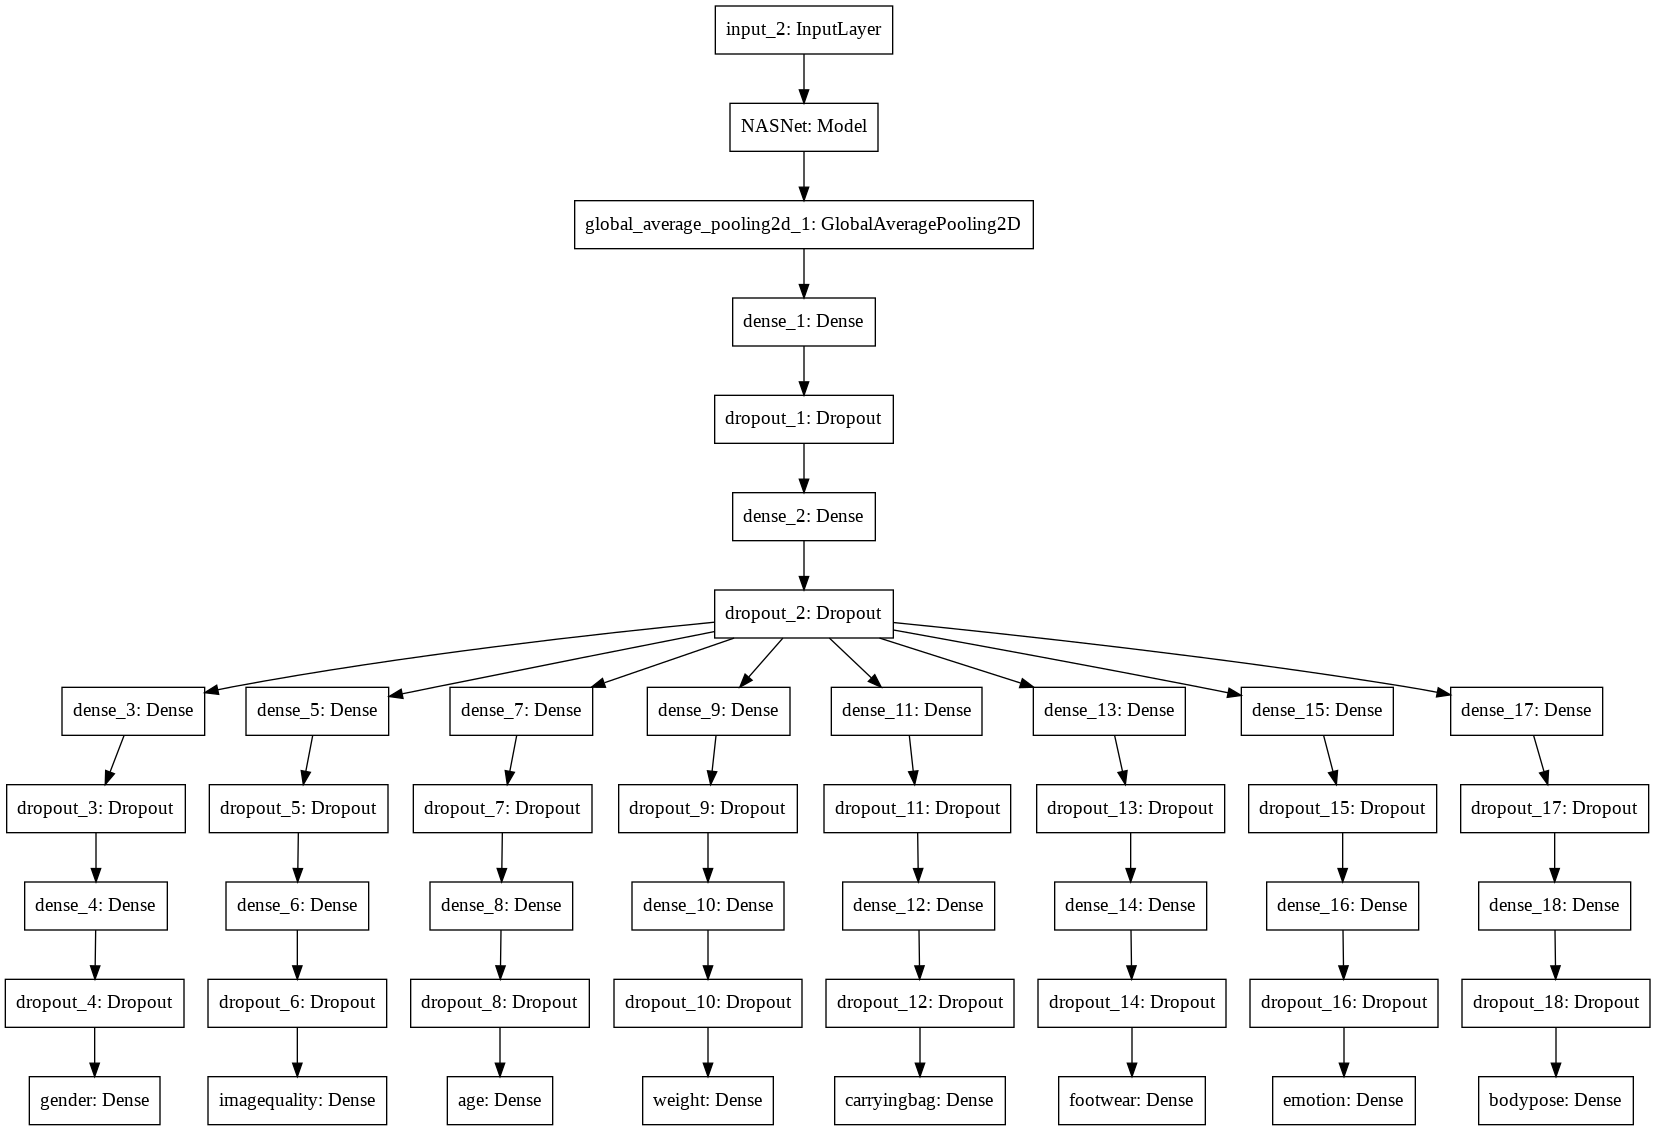

In [25]:
from keras.utils import plot_model
def multi_model(losses,test_metrics,dd):
    
    base_model = NASNetMobile(weights=None, include_top=False)

    # #freeze all the layers
    # for layer in base_model.layers[:]:
    #    layer.trainable = False
    
    model_input = Input(shape=(224, 224, 3))
    x = base_model(model_input)
    x = GlobalAveragePooling2D()(x)
    
    # let's add a fully-connected layer
    x = Dense(256, activation='relu')(x)
    x = Dropout(dd)(x)
    x = Dense(256, activation='relu')(x)
    x = Dropout(dd)(x)
    # start passing that fully connected block output to all the 
    # different model heads
    y1 = Dense(128, activation='relu')(x)
    y1 = Dropout(dd)(y1)
    y1 = Dense(64, activation='relu')(y1)
    y1 = Dropout(dd)(y1)
    
    y2 = Dense(128, activation='relu')(x)
    y2 = Dropout(dd)(y2)
    y2 = Dense(64, activation='relu')(y2)
    y2 = Dropout(dd)(y2)
    
    y3 = Dense(128, activation='relu')(x)
    y3 = Dropout(dd)(y3)
    y3 = Dense(64, activation='relu')(y3)
    y3 = Dropout(dd)(y3)

    y4 = Dense(128, activation='relu')(x)
    y4 = Dropout(dd)(y4)
    y4 = Dense(64, activation='relu')(y4)
    y4 = Dropout(dd)(y4)
    
    y5 = Dense(128, activation='relu')(x)
    y5 = Dropout(dd)(y5)
    y5 = Dense(64, activation='relu')(y5)
    y5 = Dropout(dd)(y5)

    y6 = Dense(128, activation='relu')(x)
    y6 = Dropout(dd)(y6)
    y6 = Dense(64, activation='relu')(y6)
    y6 = Dropout(dd)(y6)

    y7 = Dense(128, activation='relu')(x)
    y7 = Dropout(dd)(y7)
    y7 = Dense(64, activation='relu')(y7)
    y7 = Dropout(dd)(y7)

    y8 = Dense(128, activation='relu')(x)
    y8 = Dropout(dd)(y8)
    y8 = Dense(64, activation='relu')(y8)
    y8 = Dropout(dd)(y8)




    
    #connect all the heads to their final output layers
    y1 = Dense(gender_nodes, activation='sigmoid',name= 'gender')(y1)
    y2 = Dense(imagequality_nodes , activation='softmax',name= 'imagequality')(y2)
    y3 = Dense(age_nodes , activation='softmax',name= 'age')(y3)
    y4 = Dense(weight_nodes , activation='softmax',name= 'weight')(y4)
    y5 = Dense(carryingbag_nodes , activation='softmax',name= 'carryingbag')(y5)
    y6 = Dense(footwear_nodes  , activation='softmax',name= 'footwear')(y6)
    y7 = Dense(emotion_nodes   , activation='softmax',name= 'emotion')(y7)
    y8 = Dense(bodypose_nodes , activation='softmax',name= 'bodypose')(y8)

    Dhruv_net = Model(inputs=model_input, outputs=[ y1, y2, y3, y4, y5,y6,y7,y8])
    
    Dhruv_net.compile(loss=losses, optimizer=SGD(lr=0.01,momentum=0.9), metrics=test_metrics)

    return Dhruv_net

Dhruv_net = multi_model(losses,test_metrics,dd)

Dhruv_net.summary()
from keras.utils import plot_model
plot_model(Dhruv_net, to_file='convolutional_neural_network.png')

In [26]:
print(Dhruv_net.metrics_names)

['loss', 'gender_loss', 'imagequality_loss', 'age_loss', 'weight_loss', 'carryingbag_loss', 'footwear_loss', 'emotion_loss', 'bodypose_loss', 'gender_acc', 'imagequality_acc', 'age_acc', 'weight_acc', 'carryingbag_acc', 'footwear_acc', 'emotion_acc', 'bodypose_acc']


In [0]:
from keras.callbacks import *

class CyclicLR(Callback):
    """This callback implements a cyclical learning rate policy (CLR).
    The method cycles the learning rate between two boundaries with
    some constant frequency, as detailed in this paper (https://arxiv.org/abs/1506.01186).
    The amplitude of the cycle can be scaled on a per-iteration or 
    per-cycle basis.
    This class has three built-in policies, as put forth in the paper.
    "triangular":
        A basic triangular cycle w/ no amplitude scaling.
    "triangular2":
        A basic triangular cycle that scales initial amplitude by half each cycle.
    "exp_range":
        A cycle that scales initial amplitude by gamma**(cycle iterations) at each 
        cycle iteration.
    For more detail, please see paper.
    
    # Example
        ```python
            clr = CyclicLR(base_lr=0.001, max_lr=0.006,
                                step_size=2000., mode='triangular')
            model.fit(X_train, Y_train, callbacks=[clr])
        ```
    
    Class also supports custom scaling functions:
        ```python
            clr_fn = lambda x: 0.5*(1+np.sin(x*np.pi/2.))
            clr = CyclicLR(base_lr=0.001, max_lr=0.006,
                                step_size=2000., scale_fn=clr_fn,
                                scale_mode='cycle')
            model.fit(X_train, Y_train, callbacks=[clr])
        ```    
    # Arguments
        base_lr: initial learning rate which is the
            lower boundary in the cycle.
        max_lr: upper boundary in the cycle. Functionally,
            it defines the cycle amplitude (max_lr - base_lr).
            The lr at any cycle is the sum of base_lr
            and some scaling of the amplitude; therefore 
            max_lr may not actually be reached depending on
            scaling function.
        step_size: number of training iterations per
            half cycle. Authors suggest setting step_size
            2-8 x training iterations in epoch.
        mode: one of {triangular, triangular2, exp_range}.
            Default 'triangular'.
            Values correspond to policies detailed above.
            If scale_fn is not None, this argument is ignored.
        gamma: constant in 'exp_range' scaling function:
            gamma**(cycle iterations)
        scale_fn: Custom scaling policy defined by a single
            argument lambda function, where 
            0 <= scale_fn(x) <= 1 for all x >= 0.
            mode paramater is ignored 
        scale_mode: {'cycle', 'iterations'}.
            Defines whether scale_fn is evaluated on 
            cycle number or cycle iterations (training
            iterations since start of cycle). Default is 'cycle'.
    """

    def __init__(self, base_lr=0.001, max_lr=0.006, step_size=2000., mode='triangular',
                 gamma=1., scale_fn=None, scale_mode='cycle'):
        super(CyclicLR, self).__init__()

        self.base_lr = base_lr
        self.max_lr = max_lr
        self.step_size = step_size
        self.mode = mode
        self.gamma = gamma
        if scale_fn == None:
            if self.mode == 'triangular':
                self.scale_fn = lambda x: 1.
                self.scale_mode = 'cycle'
            elif self.mode == 'triangular2':
                self.scale_fn = lambda x: 1/(2.**(x-1))
                self.scale_mode = 'cycle'
            elif self.mode == 'exp_range':
                self.scale_fn = lambda x: gamma**(x)
                self.scale_mode = 'iterations'
        else:
            self.scale_fn = scale_fn
            self.scale_mode = scale_mode
        self.clr_iterations = 0.
        self.trn_iterations = 0.
        self.history = {}

        self._reset()

    def _reset(self, new_base_lr=None, new_max_lr=None,
               new_step_size=None):
        """Resets cycle iterations.
        Optional boundary/step size adjustment.
        """
        if new_base_lr != None:
            self.base_lr = new_base_lr
        if new_max_lr != None:
            self.max_lr = new_max_lr
        if new_step_size != None:
            self.step_size = new_step_size
        self.clr_iterations = 0.
        
    def clr(self):
        cycle = np.floor(1+self.clr_iterations/(2*self.step_size))
        x = np.abs(self.clr_iterations/self.step_size - 2*cycle + 1)
        if self.scale_mode == 'cycle':
            return self.base_lr + (self.max_lr-self.base_lr)*np.maximum(0, (1-x))*self.scale_fn(cycle)
        else:
            return self.base_lr + (self.max_lr-self.base_lr)*np.maximum(0, (1-x))*self.scale_fn(self.clr_iterations)
        
    def on_train_begin(self, logs={}):
        logs = logs or {}

        if self.clr_iterations == 0:
            K.set_value(self.model.optimizer.lr, self.base_lr)
        else:
            K.set_value(self.model.optimizer.lr, self.clr())        
            
    def on_batch_end(self, epoch, logs=None):
        
        logs = logs or {}
        self.trn_iterations += 1
        self.clr_iterations += 1

        self.history.setdefault('lr', []).append(K.get_value(self.model.optimizer.lr))
        self.history.setdefault('iterations', []).append(self.trn_iterations)

        for k, v in logs.items():
            self.history.setdefault(k, []).append(v)
        
        K.set_value(self.model.optimizer.lr, self.clr())

In [0]:
clr = lambda x: 1/(5**(x*0.0001))
clr_triangular = CyclicLR(scale_fn=clr, scale_mode='iterations')

In [30]:

checkpoint = ModelCheckpoint('best_run5_smaller.h5', monitor='val_loss', verbose=1, save_best_only=True, mode='min')
lrate = LearningRateScheduler(step_decay)
callbacks_list = [checkpoint,clr_triangular]


Dhruv_net.fit_generator(train_gen,
                    validation_data=valid_gen,
                    epochs=25,callbacks=callbacks_list)

clr_triangular._reset()
Dhruv_net.fit_generator(train_gen,
                    validation_data=valid_gen,
                    epochs=25,callbacks=callbacks_list)
clr_triangular._reset()
Dhruv_net.fit_generator(train_gen,
                    validation_data=valid_gen,
                    epochs=25,callbacks=callbacks_list)
clr_triangular._reset()
Dhruv_net.fit_generator(train_gen,
                    validation_data=valid_gen,
                    epochs=25,callbacks=callbacks_list)
clr_triangular._reset()



Epoch 1/25
  2/360 [..............................] - ETA: 2:46:06 - loss: 10.4450 - gender_loss: 0.7418 - imagequality_loss: 1.1362 - age_loss: 1.6800 - weight_loss: 1.5035 - carryingbag_loss: 1.3241 - footwear_loss: 1.2564 - emotion_loss: 1.4478 - bodypose_loss: 1.3553 - gender_acc: 0.5938 - imagequality_acc: 0.2656 - age_acc: 0.1250 - weight_acc: 0.1250 - carryingbag_acc: 0.3438 - footwear_acc: 0.4219 - emotion_acc: 0.3281 - bodypose_acc: 0.3438

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.584795). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


360/360 [==============================] - 292s 811ms/step - loss: 8.0774 - gender_loss: 0.6893 - imagequality_loss: 1.0041 - age_loss: 1.4640 - weight_loss: 1.0351 - carryingbag_loss: 0.9480 - footwear_loss: 1.0330 - emotion_loss: 0.9513 - bodypose_loss: 0.9527 - gender_acc: 0.5491 - imagequality_acc: 0.5355 - age_acc: 0.3746 - weight_acc: 0.6160 - carryingbag_acc: 0.5394 - footwear_acc: 0.4692 - emotion_acc: 0.7049 - bodypose_acc: 0.6053 - val_loss: 11.7821 - val_gender_loss: 0.7744 - val_imagequality_loss: 1.5575 - val_age_loss: 1.5727 - val_weight_loss: 1.5757 - val_carryingbag_loss: 1.4715 - val_footwear_loss: 2.1624 - val_emotion_loss: 1.3119 - val_bodypose_loss: 1.3560 - val_gender_acc: 0.5512 - val_imagequality_acc: 0.5660 - val_age_acc: 0.3770 - val_weight_acc: 0.6447 - val_carryingbag_acc: 0.5529 - val_footwear_acc: 0.3805 - val_emotion_acc: 0.7061 - val_bodypose_acc: 0.6195

Epoch 00001: val_loss improved from inf to 11.78214, saving model to best_run5_smaller.h5
Epoch 2/25


In [0]:
Dhruv_net.fit_generator(train_gen,
                    validation_data=valid_gen,
                    epochs=25,callbacks=callbacks_list)
clr_triangular._reset()
Dhruv_net.fit_generator(train_gen,
                    validation_data=valid_gen,
                    epochs=25,callbacks=callbacks_list)
clr_triangular._reset()
Dhruv_net.fit_generator(train_gen,
                    validation_data=valid_gen,
                    epochs=25,callbacks=callbacks_list)
clr_triangular._reset()
Dhruv_net.fit_generator(train_gen,
                    validation_data=valid_gen,
                    epochs=25,callbacks=callbacks_list)
clr_triangular._reset()

Epoch 1/25
360/360 [==============================] - 229s 635ms/step - loss: 5.6268 - gender_loss: 0.2084 - imagequality_loss: 0.7852 - age_loss: 1.2125 - weight_loss: 0.8431 - carryingbag_loss: 0.7186 - footwear_loss: 0.6912 - emotion_loss: 0.8281 - bodypose_loss: 0.3397 - gender_acc: 0.9189 - imagequality_acc: 0.6241 - age_acc: 0.4620 - weight_acc: 0.6662 - carryingbag_acc: 0.7069 - footwear_acc: 0.6942 - emotion_acc: 0.7138 - bodypose_acc: 0.8679 - val_loss: 7.2989 - val_gender_loss: 0.4150 - val_imagequality_loss: 1.0061 - val_age_loss: 1.4451 - val_weight_loss: 1.0122 - val_carryingbag_loss: 0.9011 - val_footwear_loss: 0.8950 - val_emotion_loss: 0.8860 - val_bodypose_loss: 0.7383 - val_gender_acc: 0.8266 - val_imagequality_acc: 0.5277 - val_age_acc: 0.3962 - val_weight_acc: 0.6084 - val_carryingbag_acc: 0.5938 - val_footwear_acc: 0.6139 - val_emotion_acc: 0.7061 - val_bodypose_acc: 0.7218

Epoch 00001: val_loss did not improve from 6.74632
Epoch 2/25
360/360 [====================

In [0]:
# # Initialize Callbacks:
# from keras.models import load_model
# ckpt_callback = ModelCheckpoint(filepath='best_run5_smaller.h5', monitor='val_loss', verbose=1, save_best_only=True, mode='min')
# lrate = LearningRateScheduler(step_decay)
# callbacks = [ckpt_callback, lrate]

# # Load checkpoint:
# checkpoint_path='best_run5_smaller.h5'
# if checkpoint_path is not None:
#     # Load model:
#     model = load_model(checkpoint_path)
#     # Finding the epoch index from which we are resuming
#     initial_epoch = 63
#     # Calculating the correct value of count
#     # count = initial_epoch*batches_per_epoch
#     # # Update the value of count in callback instance
#     # callbacks[1].count = count

# # Start/resume training
# Dhruv_net.fit_generator(train_gen,
#                     validation_data=valid_gen,
#                     epochs=200,callbacks=callbacks)